## Building a custom visualization
----
For this assignment I had to implement a visualization of sample data as described in Ferreria et al (2014). I had implemented the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis). 

I chose the **Hard option** in which I had to make the plot interactive, allowing the user to click on the y axis to set the value of interest. The bar colors change with respect to what value the user has selected.

<IPython.core.display.Javascript object>


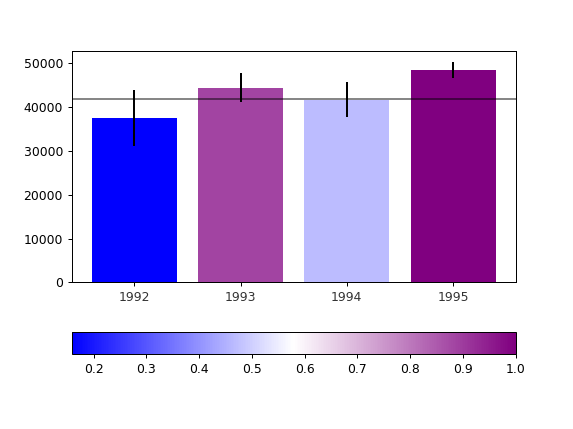

In [4]:
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib notebook')


# Use the following data for this assignment:
np.random.seed(1234)

df = pd.DataFrame([np.random.normal(32000,200000,3650),
                   np.random.normal(43000,100000,3650),
                   np.random.normal(41000,120000,3650),
                   np.random.normal(48000,55000,3650)], 
                   index = [1992, 1993, 1994, 1995])

from scipy import stats

year_avg = df.mean(axis = 1)
year_std = df.std(axis = 1)

# calculating the error using inverse cumulative density function(ppf)
yerr = year_std / np.sqrt(df.shape[1]) * stats.t.ppf(1-0.05/2, df.shape[1] - 1)

import matplotlib.pyplot as plt
plt.figure()
bars = plt.bar(range(df.shape[0]), year_avg, yerr = yerr, color = 'rgb')

# threshold line
fig = plt.gcf()
threshold = 42000
ax = plt.axhline(y = threshold, color = 'black', alpha = 0.5)


# for colorbar
import matplotlib.colors as mcol
import matplotlib.cm as cm


# draw out colors for color bar from library
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b", "white", "purple"])
cpick = cm.ScalarMappable(cmap = cm1)
cpick.set_array([])

# converting errors into percentages for color coding in bar chart
percentages = []
for bar, yerr_ in zip(bars, yerr):
    low = bar.get_height() - yerr_
    high = bar.get_height() + yerr_
    percentage = (high - threshold) / (high - low)
    if percentage > 1: percentage = 1
    if percentage < 0: percentage = 0
    percentages.append(percentage)
    
# color coding cpick.to_rgba(percentages)
bars = plt.bar(range(df.shape[0]), year_avg, yerr = yerr, color = cpick.to_rgba(percentages))
plt.colorbar(cpick, orientation = 'horizontal')

plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)



plt.show()